# Handwritten Digit Recognition with Deep Learning (Dense + CNN)

This notebook builds and trains two models using TensorFlow/Keras:
1. A simple **fully connected (dense)** neural network  
2. A **Convolutional Neural Network (CNN)** for higher accuracy

Based on the MNIST handwritten digit dataset.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


## Step 1: Load and Prepare the Data

- Normalize pixel values (0–255 → 0–1)
- Convert labels using one-hot encoding
- Reshape for CNN input if needed


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# For CNN: reshape to (samples, 28, 28, 1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Step 2: Dense Model (Fully Connected)

A basic 2-layer neural network with:
- Flatten layer
- Dense hidden layer with 128 neurons (ReLU)
- Output layer with 10 classes (Softmax)


In [4]:
dense_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_model.fit(x_train, y_train_cat,
                epochs=5, batch_size=32,
                validation_split=0.1)


Epoch 1/5


/files/home/part1/skumar/Bookworm/Desktop/ds-projects/ds-env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-15 22:36:10.935523: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8691 - loss: 0.4521 - val_accuracy: 0.9640 - val_loss: 0.1272
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1306 - val_accuracy: 0.9718 - val_loss: 0.0971
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0829 - val_accuracy: 0.9765 - val_loss: 0.0778
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9821 - loss: 0.0588 - val_accuracy: 0.9763 - val_loss: 0.0810
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0463 - val_accuracy: 0.9802 - val_loss: 0.0707


## Step 3: CNN Model (Better Accuracy)

Architecture:
- Conv2D layer with 32 filters
- MaxPooling
- Flatten + Dense layers


In [5]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(x_train_cnn, y_train_cat,
              epochs=5, batch_size=32,
              validation_split=0.1)


Epoch 1/5


/files/home/part1/skumar/Bookworm/Desktop/ds-projects/ds-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8922 - loss: 0.3580 - val_accuracy: 0.9802 - val_loss: 0.0700
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9811 - loss: 0.0636 - val_accuracy: 0.9868 - val_loss: 0.0548
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9855 - val_loss: 0.0560
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9862 - val_loss: 0.0529
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9944 - loss: 0.0190 - val_accuracy: 0.9880 - val_loss: 0.0518


In [6]:
dense_test_acc = dense_model.evaluate(x_test, y_test_cat, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]

print(f"Dense Model Accuracy: {dense_test_acc:.4f}")
print(f"CNN Model Accuracy:   {cnn_test_acc:.4f}")


Dense Model Accuracy: 0.9741
CNN Model Accuracy:   0.9845


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


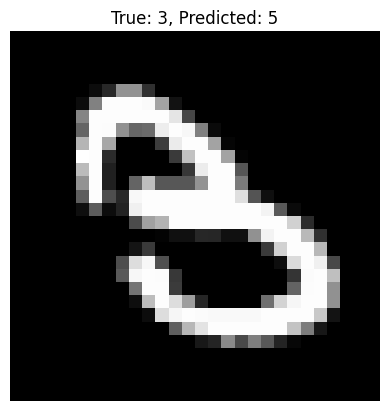

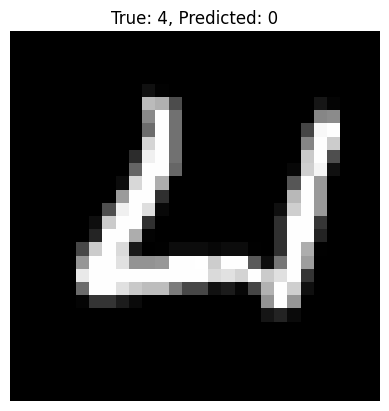

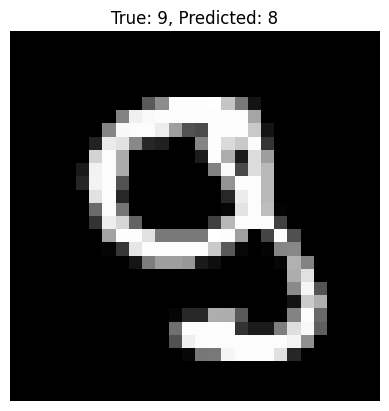

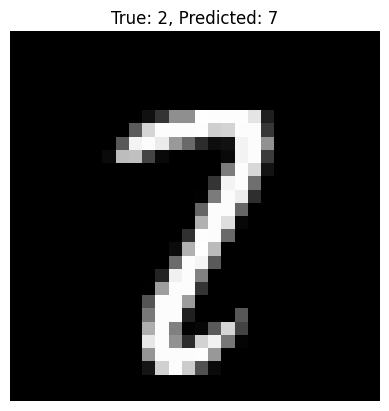

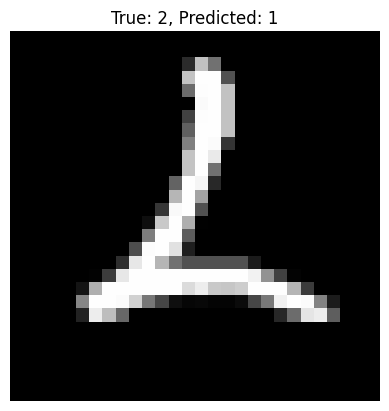

In [7]:
preds = cnn_model.predict(x_test_cnn)
wrong = np.where(np.argmax(preds, axis=1) != y_test)[0]

for i in range(5):
    idx = wrong[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {np.argmax(preds[idx])}")
    plt.axis('off')
    plt.show()
